Dataset: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

#Imports

In [0]:
import pandas as pd # Importa o Pandas

arquivo = 'https://raw.githubusercontent.com/jhklarcher/data-science/master/datasets/big-mart.csv' # Nome e local do arquivo

df = pd.read_csv(arquivo) # Cria um dataframe do pandas

# EDA Rápida

In [2]:
df.shape # Verifica o número de linhas e colunas

(8523, 12)

Verificar os primeiros itens do dataframe

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Principais estatística do dataframe

In [4]:
df.describe() 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Verificar se há valores em branco (NaN)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Verificando os possíveis valores para algumas features.

In [6]:
print('Valores possíveis de Item_Fat_Content: {}'.format(df['Item_Fat_Content'].unique()) )
print('Valores possíveis de Item_Type: {}'.format(df['Item_Type'].unique()) )
print('Valores possíveis de Outlet_Identifier: {}'.format(df['Outlet_Identifier'].unique()) )
print('Valores possíveis de Outlet_Size: {}'.format(df['Outlet_Size'].unique()) )
print('Valores possíveis de Outlet_Location_Type : {}'.format(df['Outlet_Location_Type'].unique()) )
print('Valores possíveis de Outlet_Type: {}'.format(df['Outlet_Type'].unique()) )


Valores possíveis de Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Valores possíveis de Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Valores possíveis de Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Valores possíveis de Outlet_Size: ['Medium' nan 'High' 'Small']
Valores possíveis de Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Valores possíveis de Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Corrigindo valores em Item_Fat_Content

In [0]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [0]:
df = df.drop(['Item_Identifier'], axis=1)

Gerando visualizações

In [9]:
import seaborn as sns # Importa a biblioteca Seaborn (para plot)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
sns.set(style='ticks') # Define o "estilo" que será usado nos gráficos


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


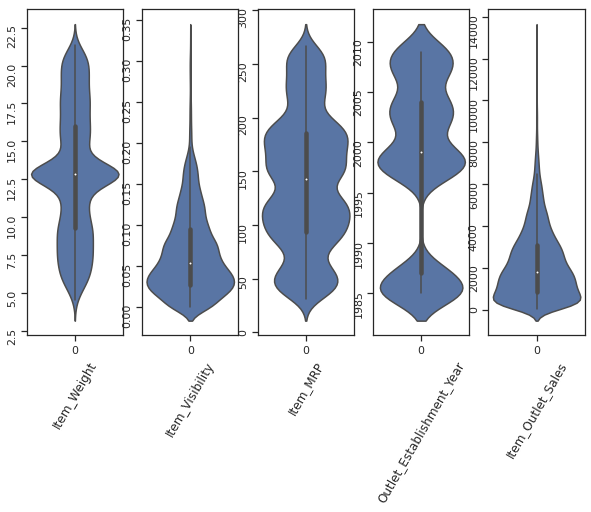

In [28]:
numericas = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
i = 1
for var in numericas:
  plt.subplot(1, 5, i)
  sns.violinplot(data=df[var])
  plt.xlabel(var, rotation=60)
  plt.yticks(rotation='vertical')
  i+=1

plt.show()

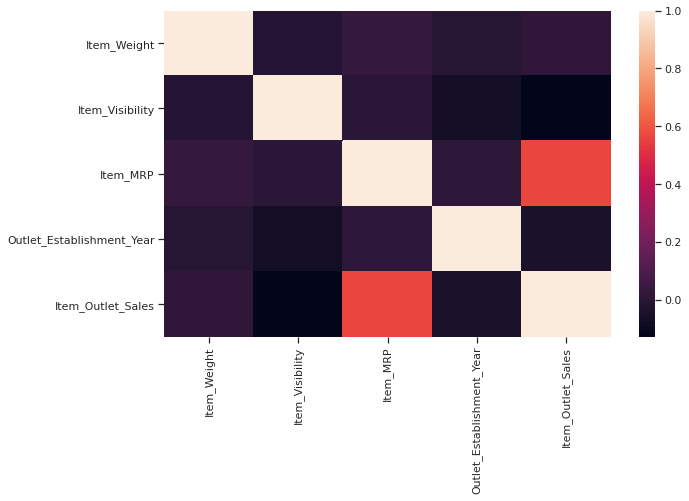

In [11]:
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df.corr())

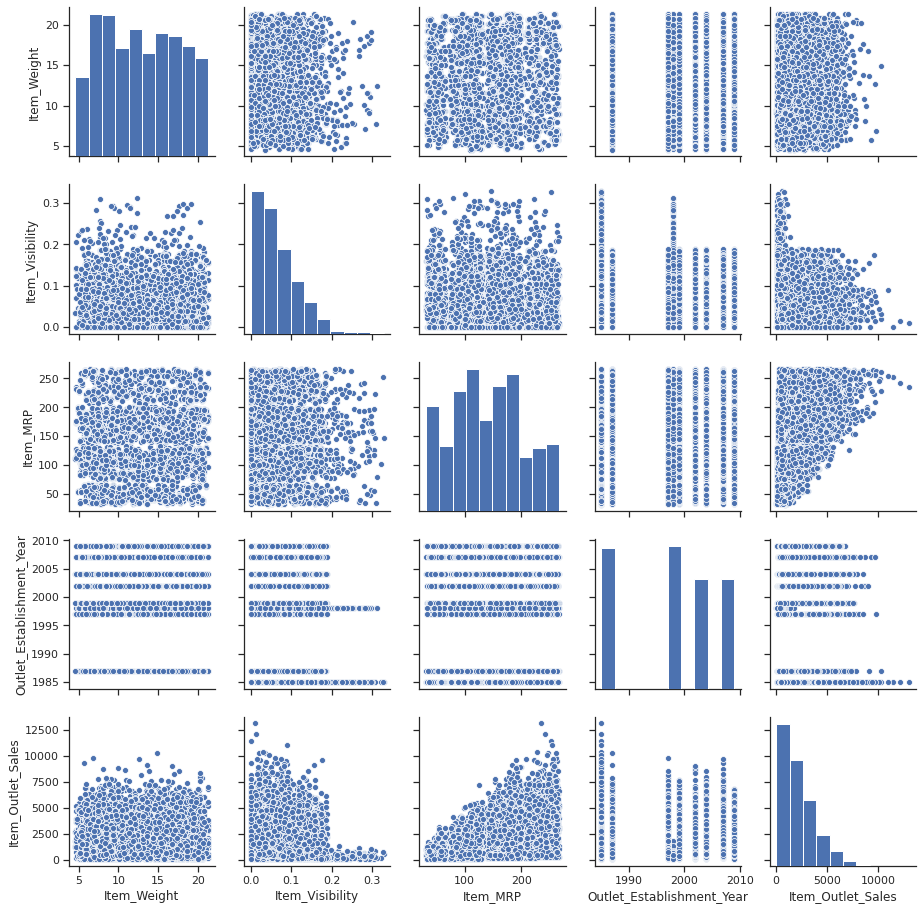

In [12]:
sns.pairplot(df)

In [13]:
df = pd.get_dummies(df)
df = df.fillna(df.mean())
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [14]:
df.shape

(8523, 44)

# Modelo

In [0]:
y = df['Item_Outlet_Sales']
X = df.drop(['Item_Outlet_Sales'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split # Importa parte do sklearn para dividir os dados de entrada entre treino e teste

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=0) # Divide os dados de entrada entre treino e teste

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
modelo = RandomForestRegressor()

In [20]:
modelo.fit(X_treino, y_treino) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np


print('MAE: {}'.format(mean_absolute_error(modelo.predict(X_teste), y_teste)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(modelo.predict(X_teste), y_teste))))


MAE: 817.8066172003754
RMSE: 1153.5254699215393


# Otimizando hiperparâmetros

Com base no tutorial do [Mario Filho](http://mariofilho.com).

In [22]:
!pip install scikit-optimize
from skopt import gp_minimize 

     |████████████████████████████████| 81kB 2.2MB/s 


In [0]:
params = [
         (200, 2000), #n_estimators
         (4, 100), # max_depth
         (1, 4), # min_samples_leaf
         (2, 10) # min_samples_split
         ]


In [0]:
def treinar_modelo(params):
    n_estimators = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    
    print(params, '\n')
    
    mdl = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_leaf=min_samples_leaf,
                                 min_samples_split=min_samples_split,
                                 n_jobs=-1,
                                 random_state=42)
    
    mdl.fit(X_treino, y_treino)

    mdl_score = np.sqrt(mean_squared_error(mdl.predict(X_teste), y_teste))
    
    return mdl_score

In [25]:
resultados_gp = gp_minimize(treinar_modelo, params, random_state=1, verbose=1, n_calls=55, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[1995, 94, 1, 10] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 51.9000
Function value obtained: 1138.9800
Current minimum: 1138.9800
Iteration No: 2 started. Evaluating function at random point.
[625, 42, 2, 7] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 16.1964
Function value obtained: 1138.0433
Current minimum: 1138.0433
Iteration No: 3 started. Evaluating function at random point.
[1884, 85, 2, 6] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 49.9258
Function value obtained: 1139.1902
Current minimum: 1138.0433
Iteration No: 4 started. Evaluating function at random point.
[998, 26, 3, 9] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 24.0625
Function value obtained: 1131.6428
Current minimum: 1131.6428
Iteration No: 5 started. Evaluating function at random point.
[1023, 45, 4, 8] 

Iteration No: 5 ended. Evaluation done at ra

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 19.8206
Function value obtained: 1101.8813
Current minimum: 1101.8813
Iteration No: 23 started. Searching for the next optimal point.
[1605, 6, 4, 10] 



/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 19.5515
Function value obtained: 1101.8834
Current minimum: 1101.8813
Iteration No: 24 started. Searching for the next optimal point.
[1600, 6, 4, 9] 

Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 19.4177
Function value obtained: 1101.9063
Current minimum: 1101.8813
Iteration No: 25 started. Searching for the next optimal point.
[1731, 6, 4, 10] 

Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 20.9125
Function value obtained: 1101.9508
Current minimum: 1101.8813
Iteration No: 26 started. Searching for the next optimal point.
[1362, 6, 4, 8] 

Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 16.7389
Function value obtained: 1101.8770
Current minimum: 1101.8770
Iteration No: 27 started. Searching for the next optimal point.
[1465, 6, 4, 8] 

Iteration No: 27 ended. Search finished for the next optimal point.
Tim

In [26]:
resultados_gp.x

[818, 6, 4, 9]

# Adaptando modelo

In [27]:
from sklearn.model_selection import cross_val_score
mdl = RandomForestRegressor(n_estimators=1483,
                             max_depth=6,
                             min_samples_leaf=4,
                             min_samples_split=9,
                             n_jobs=-1,
                             random_state=42)
scores = cross_val_score(mdl, X, y, cv=5, scoring='neg_root_mean_squared_error')

print(-scores.mean())

1084.0119317513202
